In [4]:
from bs4 import BeautifulSoup         

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [6]:
df= pd.read_excel(r'Data_file.xlsx')

In [7]:
# Print the shape of the DataFrame
df.shape

(7777, 17)

In [8]:
print("Number of rows with'معرض السيارات'in 'Car Name':", len(df[df['Car Name'] == 'معرض السيارات']))

Number of rows with'معرض السيارات'in 'Car Name': 913



Here I will delete 913 rows so that the value of the car name is equal to the "معرض السيارات". As this is corrupt data. The rest of the columns of this value are empty.

In [9]:
# Filter rows where 'Car Name' is not equal to 'معرض السيارات'
df = df[df['Car Name'] != 'معرض السيارات']

In [10]:
print("Number of rows with'معرض السيارات'in 'Car Name':", len(df[df['Car Name'] == 'معرض السيارات']))

Number of rows with'معرض السيارات'in 'Car Name': 0


In [11]:
#The total number of rows:
df.shape[0]

6864

In [12]:
6864+913

7777

Here a new feature, namely Age, was extracted from a previously existing feature

In [13]:
# Convert 'Model Year' to numeric values
df['Model Year'] = pd.to_numeric(df['Model Year'], errors='coerce')

# Calculate the age of the car
current_year = 2023  
df['Age'] = current_year - df['Model Year']

df[['Model Year', 'Age']]

,Model Year,Age
0,2014,9
3,2007,16
4,2006,17
6,1982,41
7,2014,9
...,...,...
7771,2015,8
7772,2002,21
7773,2018,5
7774,2017,6


In [14]:
year_counts = df['Age'].value_counts()
year_counts

9     575
8     534
7     525
15    499
10    345
11    344
16    342
12    314
17    308
6     302
5     277
13    227
4     215
14    207
18    175
24    170
21    150
23    136
20    116
19    104
22    103
25    101
26     99
40     76
3      74
37     62
27     61
36     47
41     46
39     43
31     37
28     36
38     35
35     31
2      27
34     22
30     20
33     18
32     13
29     12
42      7
44      7
43      7
50      3
45      2
1       2
53      1
48      1
46      1
56      1
47      1
55      1
49      1
51      1
Name: Age, dtype: int64

In [15]:
df.shape

(6864, 18)

In [16]:
df.head()

,File Name,Car Name,Model Year,Price,Car Color,Fuel Type,Car Origin,Driving License,Lime Type,Glass Type,Motor Power,Car Speedometer,Passenger Number,Payment Method,Shown Status,Previous Owners,Extras,Age
0,500118.txt,كيا اوبتيما,2014,100000,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,75000,4,نقدا,للبيع,يد اولى,فتحة سقف,9
3,500163.txt,كيا سورينتو,2007,60000,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500.0,130000,7,إمكانية التقسيط,للبيع أو التبديل,2,فتحة سقف,16
4,500226.txt,هونداي افانتي,2006,43500,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600.0,NaN,NaN,نقدا,للبيع,NaN,NaN,17
6,500390.txt,فيات 127,1982,5500,بيج,بنزين,خصوصي,فلسطينية,عادي,يدوي,906.0,شغال,4,إمكانية التقسيط,للبيع,00,NaN,41
7,500393.txt,بيجو 208,2014,54000,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200.0,38000,4,نقدا,للبيع,NaN,NaN,9


In [17]:
df.columns

Index(['File Name', 'Car Name', 'Model Year', 'Price', 'Car Color',
       'Fuel Type', 'Car Origin', 'Driving License', 'Lime Type', 'Glass Type',
       'Motor Power', 'Car Speedometer', 'Passenger Number', 'Payment Method',
       'Shown Status', 'Previous Owners', 'Extras', 'Age'],
      dtype='object')

In [18]:
new_names=['File_Name', 'Car_Name', 'Model_Year', 'Price', 'Car_Color',
       'Fuel_Type','Car_Origin', 'Driving_License', 'Lime_Type', 'Glass_Type',
       'Motor_Power', 'Car_Speedometer', 'Passenger_Number', 'Payment_Method',
       'Shown_Status', 'Previous_Owners', 'Extras', 'Age']

In [19]:
#Change the columns names 
df = df.set_axis(new_names, axis=1, copy=False)

In [20]:
df.columns

Index(['File_Name', 'Car_Name', 'Model_Year', 'Price', 'Car_Color',
       'Fuel_Type', 'Car_Origin', 'Driving_License', 'Lime_Type', 'Glass_Type',
       'Motor_Power', 'Car_Speedometer', 'Passenger_Number', 'Payment_Method',
       'Shown_Status', 'Previous_Owners', 'Extras', 'Age'],
      dtype='object')

In [21]:
df.head(2)

,File_Name,Car_Name,Model_Year,Price,Car_Color,Fuel_Type,Car_Origin,Driving_License,Lime_Type,Glass_Type,Motor_Power,Car_Speedometer,Passenger_Number,Payment_Method,Shown_Status,Previous_Owners,Extras,Age
0,500118.txt,كيا اوبتيما,2014,100000,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000.0,75000,4,نقدا,للبيع,يد اولى,فتحة سقف,9
3,500163.txt,كيا سورينتو,2007,60000,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500.0,130000,7,إمكانية التقسيط,للبيع أو التبديل,2,فتحة سقف,16


In [22]:
df.Car_Speedometer.value_counts()

100000              115
200000              111
00000                83
75000                80
50000                78
                   ... 
100405                1
................      1
49000كيلو متر         1
170 الف               1
7686866               1
Name: Car_Speedometer, Length: 1021, dtype: int64

In [23]:
df['Car_Speedometer1'] = df.Car_Speedometer.str.extract(r'(\d+[.\d]*)')

In [24]:
df['Car_Speedometer_txt'] = df['Car_Speedometer'].str.replace(r'(\d+[.\d]*)', '', regex=True)

In [25]:
df.Car_Speedometer1.value_counts()

100000     117
200000     112
00000       83
75000       81
50000       79
          ... 
123126       1
263200       1
16352        1
124456       1
7686866      1
Name: Car_Speedometer1, Length: 841, dtype: int64

In [26]:
df.isna().sum() 

File_Name                 0
Car_Name                  0
Model_Year                0
Price                     0
Car_Color                 0
Fuel_Type                 0
Car_Origin                0
Driving_License           0
Lime_Type                 0
Glass_Type                0
Motor_Power               0
Car_Speedometer        1941
Passenger_Number        778
Payment_Method            0
Shown_Status              0
Previous_Owners        1650
Extras                 5049
Age                       0
Car_Speedometer1       1997
Car_Speedometer_txt    1941
dtype: int64

In [27]:
df.Previous_Owners.value_counts()

2                            636
يد اولى                      596
3                            539
1                            525
0                            376
                            ... 
123423                         1
اصل تدريب سواقه                1
يد أولى بعد الاستيراد          1
يد 17                          1
يد اولى من الشركة المتحدة      1
Name: Previous_Owners, Length: 278, dtype: int64

In [28]:
df['Previous_Owners1'] = df.Previous_Owners.str.extract(r'(\d+[.\d]*)')

In [29]:
 df['Previous_Owners_txt'] = df['Previous_Owners'].str.replace(r'(\d+[.\d]*)', '', regex=True)

In [30]:
df.Previous_Owners1.value_counts()

2              657
3              560
1              534
0              387
4              318
5              202
6               86
7               53
00              34
8               31
9               26
10              19
12              15
11              14
00000           13
000             10
0000             9
000000           5
15               4
12345            3
00000000         3
18               3
17               3
13               2
0000000          2
03               2
16               1
159000           1
01               1
11111            1
19               1
0778244          1
00009            1
1000             1
04               1
78888877766      1
14               1
123423           1
0000000000       1
000000000        1
56               1
170000           1
44444            1
Name: Previous_Owners1, dtype: int64

In [31]:
len(df['Previous_Owners_txt'].unique())

218

In [32]:
df['Previous_Owners_txt'].unique()

array(['يد اولى', '', nan, 'يد ثانية', 'يد ثانيه', 'ثالثة',
       'غير منمر استيراد الماني', 'غير منمرة', 'أولى', 'يد اولا',
       'يد ثالثة', 'ثانية', 'يد أولى', 'يد سادسة', 'اولى', 'صفر', 'رابعه',
       'يد رابعة', 'يد ثالثه', '...', 'يد أولى استيراد', 'يد اولي ',
       '......', 'ثانيه', 'واحد', 'اربعة', 'اولا', 'غير منمره',
       'يد تالته', 'يد رابعه', 'يد ثالثة ( فتيات)', '-', 'مش منمر',
       ' مستورده', 'يد تانيه', 'يد ', 'مستورد', 'استيراد مباشر من كوريا',
       'يد خامسة', '********', 'نعم', 'مش منمرة', 'يداولى',
       'يد أولى وكالة', 'يد خامسه', 'يدو اولى', 'للبيع', 'يد واله',
       'مش منمره', 'ثالثه', 'اول', 'رابعة', 'منمره', 'يد ولا', 'يد عاشره',
       'يدثانيه', 'لا يوجد', '.', 'لايوجد', 'مستورد شركة', 'ايد ثانيه',
       'يد صفر', 'يد اولى شركة', 'استيراد الماني', 'يد. اولى', 'غير منمر',
       'يد تاسعة', 'مستود غير منمر', 'اثنان', 'ياولى', 'يد', 'استيراد',
       'يد اول', 'يد اولى وكالة', 'يد تاني', 'يد ثني',
       'يد اولى  اصل شركة', '.........', 'يدثال

In [33]:
df.Car_Speedometer_txt.value_counts()

                4665
 الف              56
الف               21
شغال              19
 كيلو متر         14
                ... 
ماشيه الف كم       1
 ألف كم            1
 صفر كيلو          1
مش كتير            1
متور جديد          1
Name: Car_Speedometer_txt, Length: 78, dtype: int64

In [34]:
df.Car_Speedometer_txt.describe()

count     4923
unique      78
top           
freq      4665
Name: Car_Speedometer_txt, dtype: object

In [35]:
df['Car_Speedometer_txt'].unique()

array(['', nan, 'شغال', ' الف', ',', '_', '-', 'قابل لزيادة', 'الف',
       ' كيلو', ' كيلو متر', ' الف كيلو متر', '.....', ' كم', '....',
       'واحد', ' كيلومتر', '................', '********', 'كيلو متر',
       '  كيلو', 'كم', ' Km', 'الف كيلو', ' الف كيلو', 'ما انتبهت',
       'صفر كيلو', '____', 'اكثر من سيارة', '.........', ' الاف', '...',
       'الف فقط', ' الف سنويا', ' كيلومتير', 'لا  ا\u200fعلم', '،',
       'الف كيلو متر', ' ', '...........', ' الف كم', ' Mil', '  الف',
       '******', 'ماشيه الف كم', ' ألف كم', ' صفر كيلو', 'مش كتير',
       ' فقط', '… ..', ' ألف كيلو', 'صفر ..كيلو', 'عداد غير حقيقي',
       ' الاف كيلو', '......', 'ج', ', km', ', كيلومتر', ' ألف كيلومتر',
       ' الف ماشيه', 'آلف', ' الف ك', 'جديد', ' الف فقط',
       '..........o.........', '!!!!', 'ماشيه  الف كم', '...............',
       'صفر', '””', '........', 'ش', 'km', 'km عداد اصلي', '؟', '.',
       '  ألف', ' km', 'متور جديد'], dtype=object)

In [36]:
print(df['Car_Speedometer1'])

0         75000
3        130000
4           NaN
6           NaN
7         38000
         ...   
7771     130000
7772      00000
7773      50000
7774        100
7776    7686866
Name: Car_Speedometer1, Length: 6864, dtype: object


In [37]:
print(df['Car_Speedometer_txt'].dtype)

object


In [38]:
df['Car_Speedometer_txt'] = df['Car_Speedometer_txt'].str.strip()

df['Car_Speedometer_txt'].replace({"الف": 1000,
                              "الف كيلو متر": 1000,
                              "الف كيلو": 1000,
                              "ألف كيلومتر": 1000,
                              "ألف كيلو": 1000,
                              "ألف فقط": 1000,
                               "الف فقط": 1000,
                              "آلف": 1000,
                              "صفر كيلو": 0,
                              "الاف كيلو": 1000,
                                    "الف كم": 1000,
                                    "ألف كم": 1000,
                                    "ماشيه الف كم": 1000,
                                    "الف ماشيه": 1000,
                                  "ألف": 1000,
                                   "الف ك": 1000,
                                  "صفر": 0,
                                  "صفر كيلو": 0,
                                  "صفر ..كيلو": 0,       },inplace=True)

In [39]:
df['Car_Speedometer_txt'].unique()

array(['', nan, 'شغال', 1000, ',', '_', '-', 'قابل لزيادة', 'كيلو',
       'كيلو متر', '.....', 'كم', '....', 'واحد', 'كيلومتر',
       '................', '********', 'Km', 'ما انتبهت', 0, '____',
       'اكثر من سيارة', '.........', 'الاف', '...', 'الف سنويا',
       'كيلومتير', 'لا  ا\u200fعلم', '،', '...........', 'Mil', '******',
       'مش كتير', 'فقط', '… ..', 'عداد غير حقيقي', '......', 'ج', ', km',
       ', كيلومتر', 'جديد', '..........o.........', '!!!!',
       'ماشيه  الف كم', '...............', '””', '........', 'ش', 'km',
       'km عداد اصلي', '؟', '.', 'متور جديد'], dtype=object)

In [40]:
df['Car_Speedometer_txt'].replace({  "شغال": " ",
                                    "ما انتبهت": " ",
                                   ",": " ",
                                   "قابل لزيادة": " ",
                                   "كيلو": " ",
                                   "كيلو متر": " ",
                                   "................": " ",
                                   "اكثر من سيارة": " ",
                                   "____": " ",
                                   "0": " ",
                                   "Km": " ",
                                    "لا  ا": " ",
                                   "… ..'": " ",
                                   "مش كتير": " ",
                                   "فقط": " ",
                                   "******": " ",
                                   "Mil": " ",
                                   "...........": " ",
                                   "كيلومتر": " ",
                                        ", km": " ",
                                   "عداد غير حقيقي": " ",
                                    "......": " ",
                                   "ج": " ",
                                   "...............": " ",
                                   "ماشيه  الف كم": " ",
                                   "!!!!": " ",
                                   "..........o.........": " ",
                                   "عداد اصلي": " ",
                                   "؟": " ",
                                           ".": " ",
                                   "km": " ",
                                   "ش": " ",
                                   "........": " ",
                                   "””": " ",
                                  }, inplace=True)

In [41]:
df['Car_Speedometer_txt'].unique()

array(['', nan, ' ', 1000, '_', '-', '.....', 'كم', '....', 'واحد',
       '********', 0, '.........', 'الاف', '...', 'الف سنويا', 'كيلومتير',
       'لا  ا\u200fعلم', '،', '… ..', ', كيلومتر', 'جديد', 'km عداد اصلي',
       'متور جديد'], dtype=object)

In [42]:
df['Car_Speedometer_txt'].replace({ "********": " ",
                                    "كم": " ",
                                   "....": " ",
                                   "واحد": " ",
                                   ".....": " ",
                                   "-": " ",
                                   "_": " ",
                                   "...": " ",
                                   "كيلومتير": " ",
                                    ".........": " ",
                                   "علم": " ",
                                   "،": " ",
                                    "متور جديد": " ",
                                    "km عداد اصلي": " ",
                                   "… ..": " ",
                                    "كيلومتر": " ",    
                                   " ": " ",                                   
                                       "علم', ": " ",
                                   "لا  ا": " ",
                                    " 0": " ",
                                    "كيلومتر\u200fالاف": " ",  
                                    "": " ", 
                                   "0": " ", 
                                   ", كيلومتر": " ", 
                                    "جديد": " ", 
                                   "لا  ا‏علم": " ", 
                                    " 0": " ", 
                                    "الاف": " ", 
                                   "الف سنويا": " ",       }, inplace=True)

In [43]:
df['Car_Speedometer_txt'].replace({ "0": " ",        }, inplace=True)

In [44]:
df['Car_Speedometer_txt'].value_counts()

        4802
1000     115
0          6
Name: Car_Speedometer_txt, dtype: int64

In [45]:
df['Car_Speedometer_txt'].unique()

array([' ', nan, 1000, 0], dtype=object)

In [46]:
df['Car_Speedometer_txt']

0          
3          
4       NaN
6          
7          
       ... 
7771       
7772       
7773       
7774       
7776       
Name: Car_Speedometer_txt, Length: 6864, dtype: object

In [47]:
df['Car_Speedometer1']

0         75000
3        130000
4           NaN
6           NaN
7         38000
         ...   
7771     130000
7772      00000
7773      50000
7774        100
7776    7686866
Name: Car_Speedometer1, Length: 6864, dtype: object

In [48]:
print(df['Car_Speedometer'],df['Car_Speedometer1'],df['Car_Speedometer_txt'])

0         75000
3        130000
4           NaN
6          شغال
7         38000
         ...   
7771     130000
7772      00000
7773      50000
7774        100
7776    7686866
Name: Car_Speedometer, Length: 6864, dtype: object 0         75000
3        130000
4           NaN
6           NaN
7         38000
         ...   
7771     130000
7772      00000
7773      50000
7774        100
7776    7686866
Name: Car_Speedometer1, Length: 6864, dtype: object 0          
3          
4       NaN
6          
7          
       ... 
7771       
7772       
7773       
7774       
7776       
Name: Car_Speedometer_txt, Length: 6864, dtype: object


In [49]:
df['Car_Speedometer_txt1'] = df.Car_Speedometer_txt.str.extract(r'(\d+[.\d]*)')

In [50]:
df['Car_Speedometer_txt1']

0       NaN
3       NaN
4       NaN
6       NaN
7       NaN
       ... 
7771    NaN
7772    NaN
7773    NaN
7774    NaN
7776    NaN
Name: Car_Speedometer_txt1, Length: 6864, dtype: object

In [51]:
df['Car_Speedometer_txt1'].value_counts()

Series([], Name: Car_Speedometer_txt1, dtype: int64)

In [52]:
df.to_excel('Test_Car_Speedometer.xlsx', index=False)

In [53]:
df['Driving_License'].value_counts()

فلسطينية      6789
نمرة صفراء      75
Name: Driving_License, dtype: int64

In [54]:
df['Driving_License'] = df['Driving_License'].str.strip()
df['Driving_License'].replace({ "فلسطينية": "Palestinian",
                                    "نمرة صفراء": "Non_Palestinian",                }, inplace=True)
            ##نمرة صفراء == non pal                     

In [55]:
df['Driving_License'].value_counts()

Palestinian        6789
Non_Palestinian      75
Name: Driving_License, dtype: int64

In [56]:
df['Car_Origin'].value_counts()

خصوصي          5833
عمومي           580
تجاري           189
تأجير           128
حكومي            96
تدريب سياقة      38
Name: Car_Origin, dtype: int64

In [57]:
df['Car_Origin'] = df['Car_Origin'].str.strip()
df['Car_Origin'].replace({ "خصوصي": "private",
                                    "عمومي": "public",
                                "تجاري": "Tegari",
                                    "تأجير": "Leasing",
                                "حكومي": "governmental",
                                    "تدريب سياقة": "training",            }, inplace=True)

In [58]:
df['Car_Origin'].value_counts()

private         5833
public           580
Tegari           189
Leasing          128
governmental      96
training          38
Name: Car_Origin, dtype: int64

In [59]:
df['Car_Color'].unique()

array(['أبيض عاجي', 'سكني', 'بيج', 'فضي', 'أسود', 'بترولي', 'أبيض',
       'أسود ميتالك', 'ذهبي', 'فيراني', 'أحمر', 'أزرق', 'أزرق سماوي',
       'رمادي', 'عدة الوان', 'رصاصي', 'برتقالي', 'أخضر', 'بني', 'خمري',
       'كحلي', 'زيتي', 'بنفسجي', 'جيشي', 'أصفر', 'كرميدي'], dtype=object)

In [60]:
df['Car_Color'] = df['Car_Color'].str.strip()

df['Car_Color'].replace({
    "فضي": "سكني",
    "فيراني": "سكني",
    "رمادي": "سكني",
    "رصاصي": "سكني",
    "جيشي": "أخضر",
    "أبيض عاجي": "أبيض",
    "أسود ميتالك": "أسود",
    "أزرق سماوي": "أزرق",
       "خمري": "أحمر",
    "زيتي": "أخضر",
    "كرميدي": "بني",
     "ذهبي": "أصفر",           }, inplace=True)

In [61]:
df['Car_Color'].unique()

array(['أبيض', 'سكني', 'بيج', 'أسود', 'بترولي', 'أصفر', 'أحمر', 'أزرق',
       'عدة الوان', 'برتقالي', 'أخضر', 'بني', 'كحلي', 'بنفسجي'],
      dtype=object)

In [62]:
df['Car_Color'] = df['Car_Color'].str.strip()

df['Car_Color'].replace({
     "أبيض" :"white" ,
   "سكني": "Grey",
     "بيج":"beige",
     "أسود":"black",
    "بترولي":"petroleum" ,
     "أصفر":"yellow",
     "أحمر":"red",
     "أزرق":"blue",
        "عدة الوان":"several colors",
     "بنفسجي":"purple",
     "كحلي":"navy blue",
      "بني":"brown",
     "أخضر":"green",
      "برتقالي":"orange",           }, inplace=True)

In [63]:
df['Car_Color'].value_counts()

white             2117
Grey              2035
black              950
blue               430
red                388
navy blue          214
green              161
yellow             160
brown              125
petroleum          106
beige               72
several colors      55
orange              35
purple              16
Name: Car_Color, dtype: int64

In [64]:
df['Fuel_Type'].unique()

array(['بنزين', 'ديزل', 'هايبرد', 'كهرباء'], dtype=object)

In [65]:
df['Fuel_Type'] = df['Fuel_Type'].str.strip()

df['Fuel_Type'].replace({
     "بنزين" :"petrol" ,
   "ديزل": "diesel",
     "هايبرد":"Hybrid",
     "كهرباء":"electricity",   }, inplace=True)

df['Fuel_Type'].unique()

array(['petrol', 'diesel', 'Hybrid', 'electricity'], dtype=object)

In [66]:
df['Lime_Type'].value_counts()

اوتوماتيك        3623
عادي             3061
نصف اوتوماتيك     180
Name: Lime_Type, dtype: int64

In [67]:
df['Lime_Type'] = df['Lime_Type'].str.strip()

df['Lime_Type'].replace({
     "اوتوماتيك" :"Automatic" ,
     "عادي": "normal",
     "نصف اوتوماتيك":"Semi automatic",      }, inplace=True)

df['Lime_Type'].value_counts()

Automatic         3623
normal            3061
Semi automatic     180
Name: Lime_Type, dtype: int64

In [68]:
df['Glass_Type'].value_counts()

الكتروني    6338
يدوي         526
Name: Glass_Type, dtype: int64

In [69]:
df['Glass_Type'] = df['Glass_Type'].str.strip()

df['Glass_Type'].replace({
     "الكتروني" :"electronic" ,
     "يدوي": "Manual",          }, inplace=True)

df['Glass_Type'].value_counts()

electronic    6338
Manual         526
Name: Glass_Type, dtype: int64

In [70]:
df['Payment_Method'].value_counts()

نقدا               4323
إمكانية التقسيط    2541
Name: Payment_Method, dtype: int64

In [71]:
df['Payment_Method'] = df['Payment_Method'].str.strip()

df['Payment_Method'].replace({
     "نقدا" :"cash" ,
   "إمكانية التقسيط": "Installment",      }, inplace=True)

df['Payment_Method'].value_counts()

cash           4323
Installment    2541
Name: Payment_Method, dtype: int64

In [72]:
df['Shown_Status'].value_counts()

للبيع               4209
للبيع أو التبديل    2596
للتبديل               59
Name: Shown_Status, dtype: int64

In [73]:
df['Shown_Status'] = df['Shown_Status'].str.strip()
df['Shown_Status'].replace({
     "للبيع": "For_sale " ,
     "للبيع أو التبديل":"Sell_or_exchange" ,
     "للتبديل": "To_switch ",        }, inplace=True)

df['Shown_Status'].value_counts()

For_sale            4209
Sell_or_exchange    2596
To_switch             59
Name: Shown_Status, dtype: int64

In [74]:
df['Shown_Status'].value_counts()

For_sale            4209
Sell_or_exchange    2596
To_switch             59
Name: Shown_Status, dtype: int64

In [75]:
df['Previous_Owners1'] = df.Previous_Owners.str.extract(r'(\d+[.\d]*)')

In [76]:
df['Previous_Owners_txt'] = df['Previous_Owners'].str.replace(r'(\d+[.\d]*)', '', regex=True)

In [77]:
len(df['Previous_Owners_txt'].unique())

218

In [78]:
len(df.Previous_Owners.value_counts())

278

In [79]:
df.describe()

,Model_Year,Motor_Power,Age
count,6864.000000,6864.000000,6864.000000
mean,2008.616259,1740.494755,14.383741
std,8.690874,589.470714,8.690874
min,1967.000000,106.000000,1.000000
25%,2005.000000,1400.000000,8.000000
50%,2011.000000,1600.000000,12.000000
75%,2015.000000,2000.000000,18.000000
max,2022.000000,9000.000000,56.000000


In [80]:
len(df.Car_Speedometer1.value_counts())

841

In [81]:
df['Car_Speedometer1'].value_counts()

100000     117
200000     112
00000       83
75000       81
50000       79
          ... 
123126       1
263200       1
16352        1
124456       1
7686866      1
Name: Car_Speedometer1, Length: 841, dtype: int64

In [82]:
df['Car_Speedometer1'].unique()

array(['75000', '130000', nan, '38000', '123456', '50000', '56000',
       '460000', '45000', '70000', '79000', '000', '150', '210000', '1',
       '20000', '00000000000000000', '113000', '33000', '122',
       '00000000000000', '22000', '150000', '29000', '123457', '250000',
       '140000', '122000', '78000', '00000', '900000', '7', '00000000',
       '65000', '190', '184000', '200', '30000', '295000', '60000',
       '143212', '43000', '71', '160000', '4000', '121000', '9900', '260',
       '0000', '80', '200000', '60', '124000', '120000', '100000',
       '90000', '000000', '99', '82000', '32123123', '120', '166000',
       '275000', '82700', '123000', '500000', '18000000', '80000',
       '87000', '110000', '350000', '700000', '55', '400000', '35000',
       '380000', '167000', '140', '160', '123456789', '111111', '94000',
       '90', '46000', '82', '51', '280000', '115', '300000', '41000',
       '196000', '274000', '2000', '136000', '116000', '13700', '132',
       '54000', '40

In [83]:
df['Car_Speedometer1'].replace({
    "00000000000000000":"0",
     "00000000000000":"0",
     "00000000":"0",
     "00000":"0",
     "000":"0",
     "0000":"0",
     "000000":"0",
     "0000000009":"0",
     "00008800":"0",
     "0000000000000000":"0",
     "0000000000000":"0",
     "0000000000000000000005":"0",
     "000008":"0",
     "0088000000":"0",
     "00000000000":"0",
     "0000014":"0",
     "0000000112315":"0",
     "000000000000":"0",
     "000000000":"0",
     "22222222":"0",
     "0012345":"0",
     "0000000000":"0",
     "0000000":"0",
     "00":"0",
     "6006869666666686855888":"0",         }, inplace=True)

In [84]:
df.Extras.value_counts()

فتحة سقف    1815
Name: Extras, dtype: int64

In [85]:
df['Extras'] = df['Extras'].str.strip()
df['Extras'].replace({
    "فتحة سقف":"sunroof",           }, inplace=True)

In [86]:
df.Extras.value_counts()

sunroof    1815
Name: Extras, dtype: int64

In [87]:
# Convert columns to numeric if they contain string values
df['Car_Speedometer1'] = pd.to_numeric(df['Car_Speedometer1'], errors='coerce')
df['Car_Speedometer_txt'] = pd.to_numeric(df['Car_Speedometer_txt'], errors='coerce')

# Create a new column by multiplying the values in parallel
condition = df['Car_Speedometer_txt'] == 1000
df.loc[condition, 'Car_Speedometer1'] *= 1000

In [88]:
len(df.Car_Speedometer_txt1.value_counts())

0

In [89]:
columns_to_drop = ['Car_Speedometer_txt1', 'Car_Speedometer_txt', 'Car_Speedometer']

for column in columns_to_drop:
    del df[column]

In [90]:
df.head(2)

,File_Name,Car_Name,Model_Year,Price,Car_Color,Fuel_Type,Car_Origin,Driving_License,Lime_Type,Glass_Type,Motor_Power,Passenger_Number,Payment_Method,Shown_Status,Previous_Owners,Extras,Age,Car_Speedometer1,Previous_Owners1,Previous_Owners_txt
0,500118.txt,كيا اوبتيما,2014,100000,white,petrol,private,Palestinian,Automatic,electronic,2000.0,4,cash,For_sale,يد اولى,sunroof,9,75000.0,NaN,يد اولى
3,500163.txt,كيا سورينتو,2007,60000,Grey,diesel,private,Palestinian,Semi automatic,electronic,2500.0,7,Installment,Sell_or_exchange,2,sunroof,16,130000.0,2,


In [91]:
def arabic_to_english(text):
    arabic_numerals = {'٠': '0', '١': '1', '٢': '2', '٣': '3', '٤': '4', '٥': '5', '٦': '6', '٧': '7', '٨': '8', '٩': '9'}
    
    if isinstance(text, str):
        for arabic, english in arabic_numerals.items():
            text = text.replace(arabic, english)
    
    return text

In [92]:
df['Previous_Owners1'] = df['Previous_Owners1'].apply(arabic_to_english)

In [93]:
df.columns

Index(['File_Name', 'Car_Name', 'Model_Year', 'Price', 'Car_Color',
       'Fuel_Type', 'Car_Origin', 'Driving_License', 'Lime_Type', 'Glass_Type',
       'Motor_Power', 'Passenger_Number', 'Payment_Method', 'Shown_Status',
       'Previous_Owners', 'Extras', 'Age', 'Car_Speedometer1',
       'Previous_Owners1', 'Previous_Owners_txt'],
      dtype='object')

In [94]:
df['Previous_Owners1'].unique()

array([nan, '2', '00', '0', '1', '4', '3', '8', '5', '9', '0000', '6',
       '7', '159000', '12', '10', '00000', '11', '03', '56', '13', '16',
       '17', '000000', '000', '78888877766', '15', '170000', '18',
       '000000000', '00000000', '0000000000', '123423', '14', '04',
       '12345', '1000', '00009', '0778244', '19', '11111', '0000000',
       '01', '44444'], dtype=object)

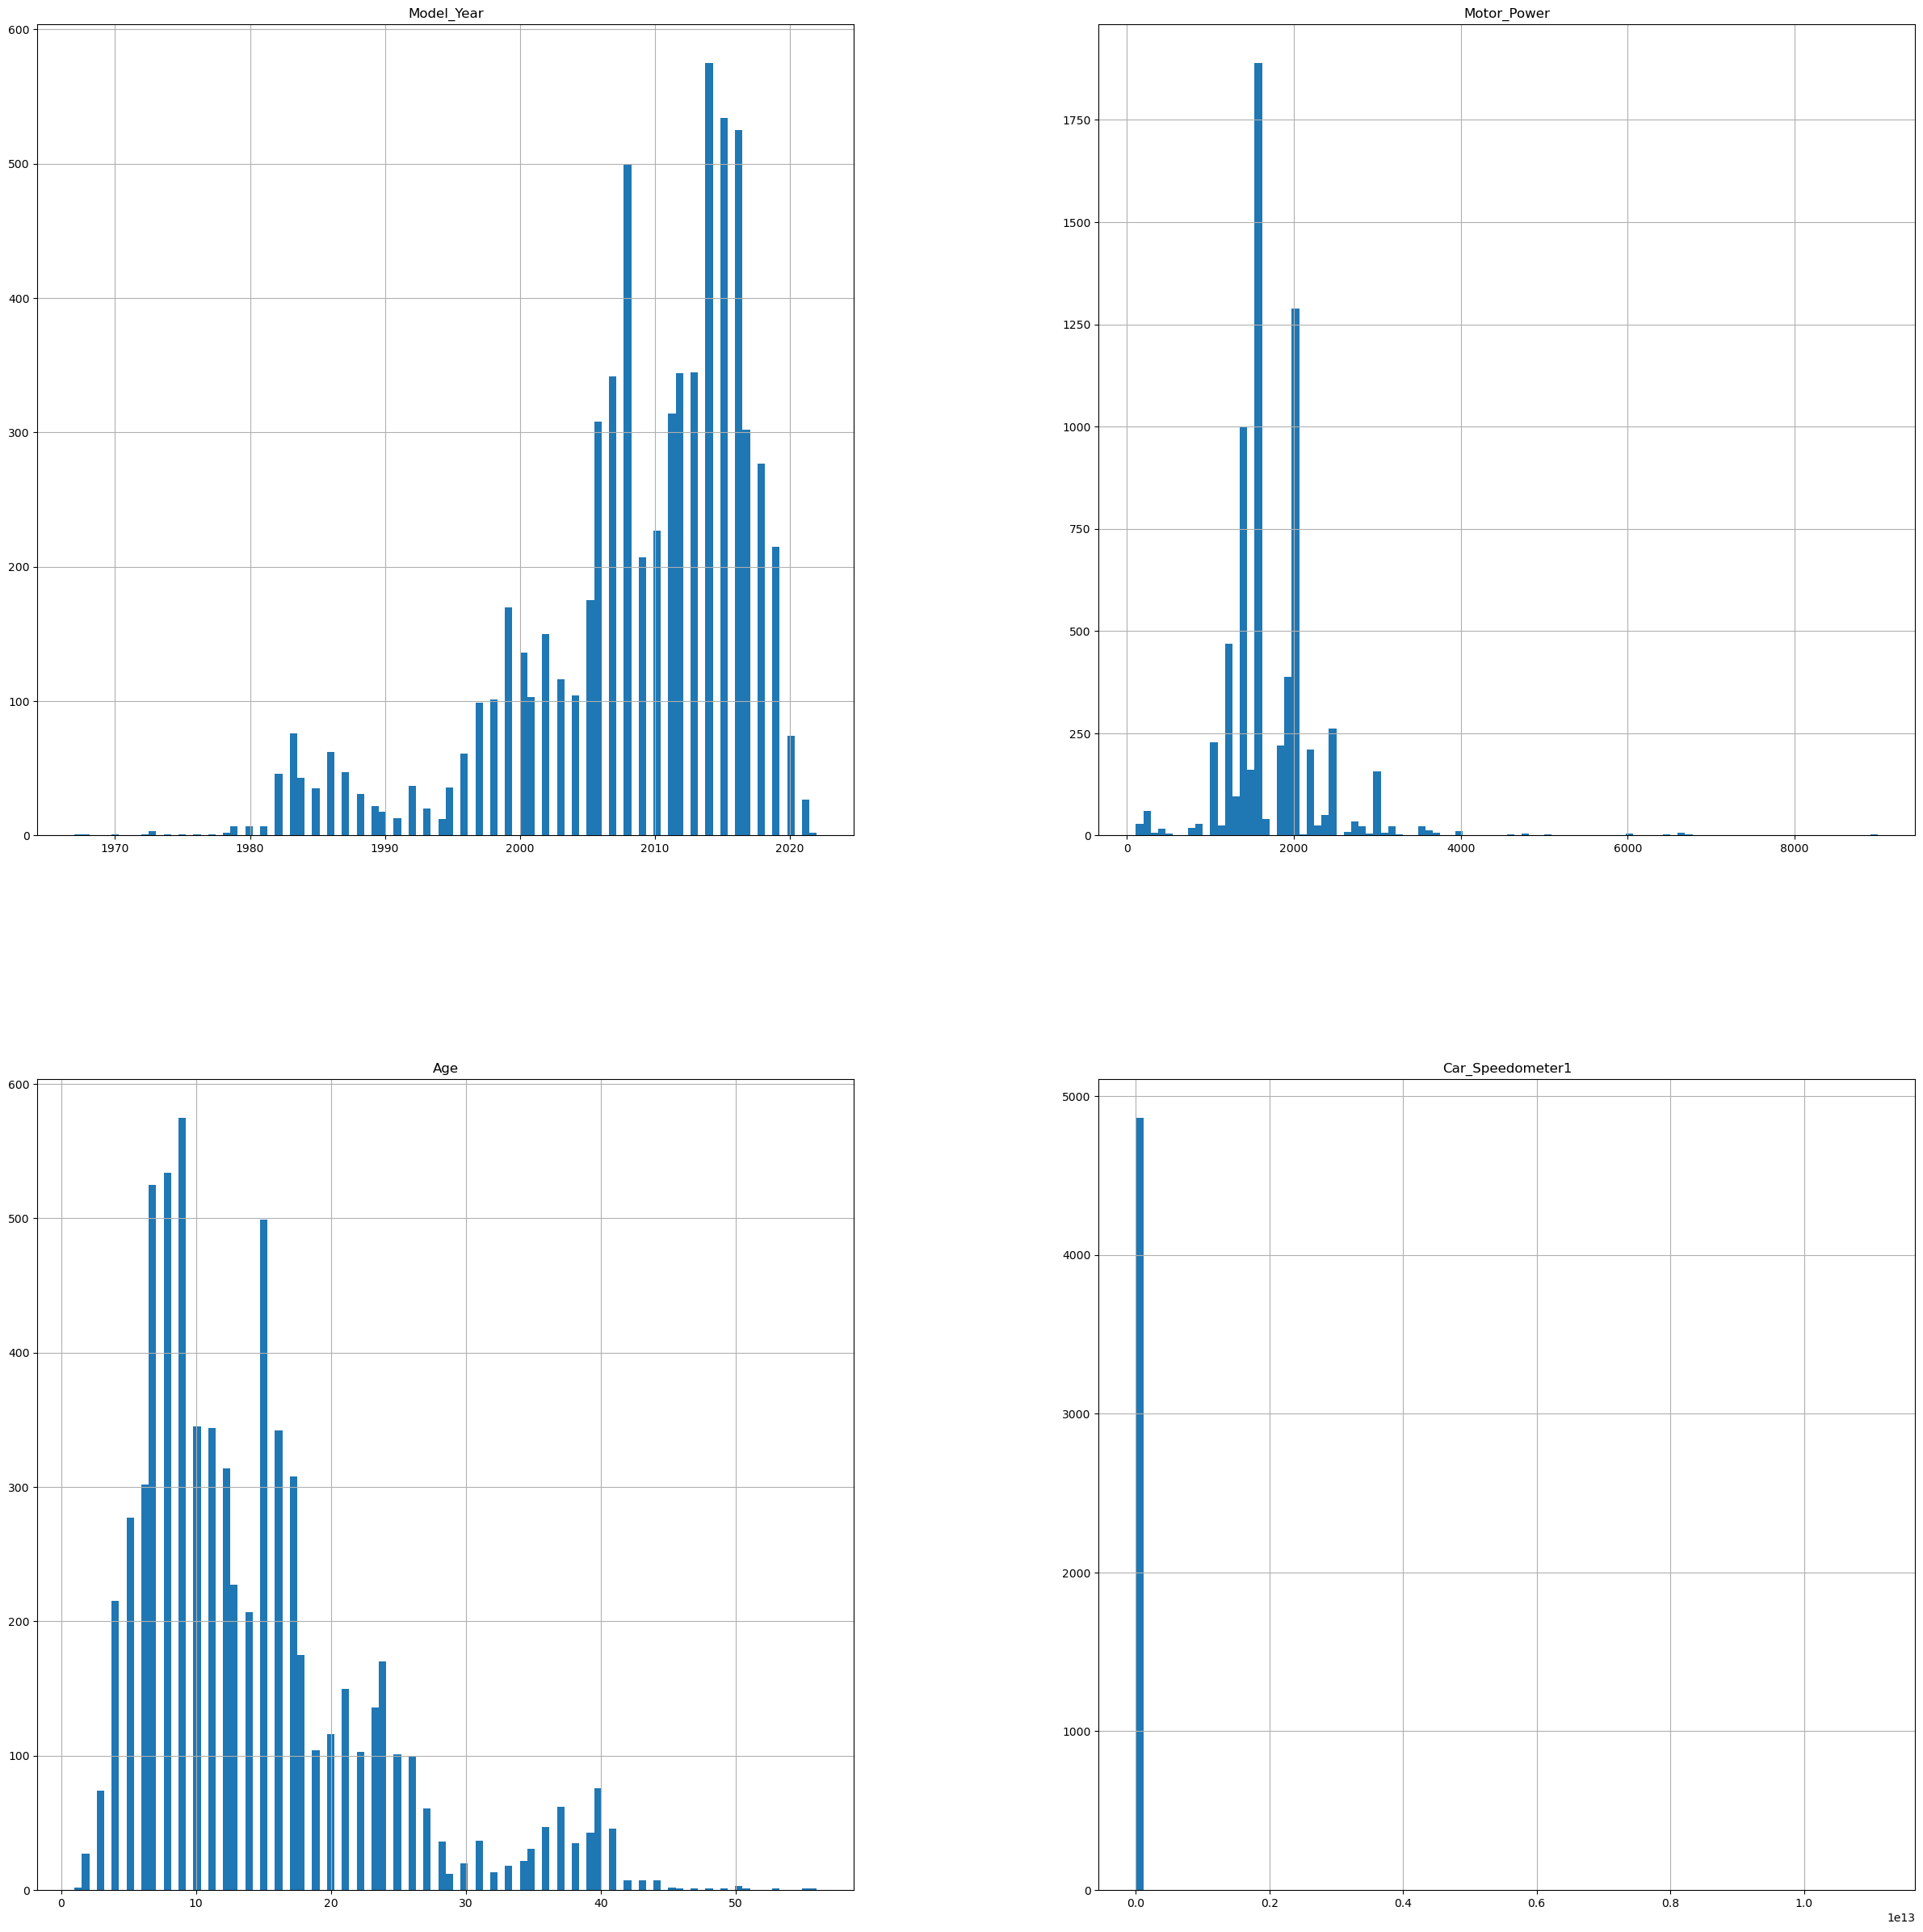

In [95]:
import matplotlib.pyplot as plt  # Import the pyplot module from Matplotlib
df.hist(bins=100,figsize=(30,30))
plt.show()

In [96]:
df['Previous_Owners1'].replace({
    "00":"0",
     "0000":"0",
     "159000":"0",
     "00000":"0",
     "000000":"0",
     "000":"0",
     "78888877766":"0",
       "170000":"0",
     "000000000":"0",
     "00000000":"0",
     "0000000000":"0",
       "123423":"0",
     "12345":"0",
     "0778244":"0",
     "11111":"0",
     "0000000":"0",
     "44444":"0",
     "01":"1",
     "00009":"9",
     "03":"3",
     "04":"4",
     "1000":"0",
     "56":"0",
     "19":"0",
     "18":"0",
     
      
}, inplace=True)

In [97]:
df['Previous_Owners1'].unique()

array([nan, '2', '0', '1', '4', '3', '8', '5', '9', '6', '7', '12', '10',
       '11', '13', '16', '17', '15', '14'], dtype=object)

In [98]:
df.Previous_Owners1.value_counts()

2     657
3     562
1     535
0     481
4     319
5     202
6      86
7      53
8      31
9      27
10     19
12     15
11     14
15      4
17      3
13      2
16      1
14      1
Name: Previous_Owners1, dtype: int64

In [99]:
df.Previous_Owners_txt.value_counts()

                             2922
يد اولى                       596
يد ثانية                      236
يد ثانيه                      186
يد أولى                       147
                             ... 
مستورده يد اولى                 1
استراد شخصي                     1
@                               1
يد اولى صفر كيلو                1
يد اولى من الشركة المتحدة       1
Name: Previous_Owners_txt, Length: 217, dtype: int64

In [100]:
df['Previous_Owners_txt'].unique()

array(['يد اولى', '', nan, 'يد ثانية', 'يد ثانيه', 'ثالثة',
       'غير منمر استيراد الماني', 'غير منمرة', 'أولى', 'يد اولا',
       'يد ثالثة', 'ثانية', 'يد أولى', 'يد سادسة', 'اولى', 'صفر', 'رابعه',
       'يد رابعة', 'يد ثالثه', '...', 'يد أولى استيراد', 'يد اولي ',
       '......', 'ثانيه', 'واحد', 'اربعة', 'اولا', 'غير منمره',
       'يد تالته', 'يد رابعه', 'يد ثالثة ( فتيات)', '-', 'مش منمر',
       ' مستورده', 'يد تانيه', 'يد ', 'مستورد', 'استيراد مباشر من كوريا',
       'يد خامسة', '********', 'نعم', 'مش منمرة', 'يداولى',
       'يد أولى وكالة', 'يد خامسه', 'يدو اولى', 'للبيع', 'يد واله',
       'مش منمره', 'ثالثه', 'اول', 'رابعة', 'منمره', 'يد ولا', 'يد عاشره',
       'يدثانيه', 'لا يوجد', '.', 'لايوجد', 'مستورد شركة', 'ايد ثانيه',
       'يد صفر', 'يد اولى شركة', 'استيراد الماني', 'يد. اولى', 'غير منمر',
       'يد تاسعة', 'مستود غير منمر', 'اثنان', 'ياولى', 'يد', 'استيراد',
       'يد اول', 'يد اولى وكالة', 'يد تاني', 'يد ثني',
       'يد اولى  اصل شركة', '.........', 'يدثال

In [101]:
df['Previous_Owners_txt'] = df['Previous_Owners_txt'].str.strip()
df['Previous_Owners_txt'].replace({
   "يد اولى":"1",
    "يد ثانية":"2",
    "يد ثانيه":"2",
    "ثالثة":"3",
    "أولى":"1",
    "يد اولا":"1",
    "يد ثالثة":"3",
    "يد ثالثه":"3",
    "ثانية":"2",
    "يد أولى":"1",
    "يد سادسة":"6",
    "رابعه":"4",
    "اولى":"1",
    "صفر":"0",
    "يد رابعة":"4",
    "يد أولى استيراد":"1",
    "يد اولي":"1",
    "يد تالته":"3",
    "غير منمرة":"0",
    "غير منمر استيراد الماني":"0",
    "ثانيه":"2",
    "غير منمره":"0",
    "اربعة":"4",
    "واحد":"1",
    "اولا":"1",
    "يد":"1",
    "يد تانيه":"2",
    "مستورده":"0",
    "مش منمر":"0",
    "مستورد":"0",
    "********":"0",
    "استيراد مباشر من كوريا":"0",
    "يد خامسة":"5",
    "مش منمرة":"0",
    "يداولى":"1",
    "يد واله":"1",
    "مش منمره":"0",
    "يد خامسه":"5",
    "نعم":"0",
    "يد ولى":"1",
    "رابعة":"4",
    "يد صفر":"0",
    "يدثانيه":"2",
    "ثالثه":"3",
    "يد عاشره":"10",
    "اصحاب سابقون صفر":"0",
    "مستورد شركة":"0",
    "لا يوجد":"0",
    "يد أولى وكالة":"1",
    "اول":"1",
    "ايد ثانيه":"2",
    "منمره":"0",
    "للبيع":"0",
    "يد ولا":"1",
    "يد رابعه":"4",
    "يد ثالثة ( فتيات)":"3",
    "يد اولى شركة":"1",
    "لايوجد":"0",
    "يد. اولى":"1",
    "غير منمر":"0",
    "يد اول":"1",
    "يد تاسعة":"9",
    "مستود غير منمر":"0",
    "استيراد الماني":"0",
    "اثنان":"2",
    "ياولى":"1",
    "يد":"1",
    "استيراد":"0",
    "يد اولى وكالة":"0",
    "يد تاني":"2",
    "يد اولي":"1",
    "يدثالثة":"3",
    "يد ثني":"2",
    "يد اولى  اصل شركة":"1",
    ".........":"0",
    "يد اولى اصحاب سابقون":"1",
    "يد خامساً":"5",
    "اوله":"1",
    "يداولا":"1",
    "يد  بس نخب السيارة":"1",
    "يد ثالث":"3",
    "مش منمرا":"0",
    "وارد كوريا يد اولى":"1",
    "يد ثاتيه":"2",
    "مستوردة غير مرخصة":"0",
    "يد تانية":"2",
    "مستوردة":"0",
    "صفرض":"0",
    "**********":"0",
    "@":"0",
    "مستورد كوري":"0",
    "ايد":"1",
    "أيد تانية":"2",
    "يد اولى صفر كيلو":"1",
    "...":"0",
    "-":"0",
    "يدو اولى":"1",
    ".":"0",
    "يد اولى اصحاب سابقون":"1",
    "يدثانية":"2",
    "استراد شخصي":"0",
    "مستورده يد اولى":"1",
    "******":"0",
    "ايد اولى":"1",
    "تانيه":"2",
    "يد خمسة":"5",
    "خمسه":"5",
    "استيراد كوري":"0",
    "يدتانيه":"2",
    "يدخامسه":"5",
    "من الشركه مباشر لا يوجد اصحاب سابقون":"0",
    "....":"0",
    "يد ثاني.":"2",
    "اشخاص":"0",
    "تالته":"3",
    "اصل تدريب سواقه":"0",
    "عدد":"0",
    "يد ثاني":"2",
    "يد أولى بعد الاستيراد":"1",
    "تالته":"3",
     "عدد":"0",
    "يد أولئ أصحاب سابقون صفر":"0",
    "يد سابعة":"7",
    "يد ثامنه":"8",
    "ايد ثانية":"2",
    "ثمانيه":"8",
    "ايد رابعه":"4",
    "ثالث":"3",
    "ثانبه":"2",
    "يدثالثه":"3",
    "استراد":"0",
    "ثاني":"2",
    "فقط يد اولى":"1",
    "وارد المانيا":"0",
    "استيراد كوريا":"0",
    "انا":"1",
    "يد أولي":"1",
    "تانبه":"2",
    "استيراد مباشر من اوروبا":"0",
    "يد أولي":"1",
    "خمسة":"5",
    "يد اولى فقط":"1",
    "خامسة":"5",
    "يد ثانيا":"2",
    "يد أولى":"1",
    "اولى\x89":"1",
    "يد اولى / استيراد":"1",
    "Zero":"0",
    "مش منمر . (صفر)":"0",
    "ثالثى":"3",
    "بد اولى مستورد":"1",
    "يد اولى من الشركة المتحدة":"1",
    "يدى اوله":"1",
    "تالثه":"3",
    "الثانية":"2",
    "ايد اوله":"1",
    "مستوردة يد اولى":"1",
    "يد ثالثي":"2",
    "نفس الشخص":"1",
    "يد عاشرة":"10",
    "أستيراد ألماني":"0",
    "يد اةلي":"1",
    "يد واحد":"1",
    "لا شيء":"0",
    "غير منمرمستوردة":"0",
    "?":"0",
    "ايد ثالثة":"3",
    "يد اولىً":"1",
    "مشطوب":"0",
    "يد اولة":"1",
    "يد اولة":"1",
    "سابعه":"7",
    "يد اولى استيراد شخصي":"1",
    "E":"0",
    "يديانيه":"2",
    "تانية":"2",
    "استيراد المانيا":"0",
    "ايد أولى":"1",
    "يداولى سحب شركه":"1",
    "استيراد كوريا - جديد مش منمر":"0",
    "يد واحدة":"1",
    "..":"0",
    "يد أولئ":"1",
    "خمس":"5",
    "يد ا":"1",
    "يد اوله":"1",
    "ايدثانيه":"2",
    "سحب شركة":"0",
    "يد اولى":"1",
    "استيراد شخصي":"1",
    "شطب":"0",
    "يد اولئ":"1",
    "ا":"0",
    "،":"0",
    "؟":"0",
    "اصل شركة":"0",
    ",":"0",
    "خامسه":"5",
    "استيراد مباشر":"0",
    "Ooo":"0",
    "يد أولى،...":"1",
    "تاني":"2",
    "مستوردة غير منمرة":"0",
    "خصوصي":"0",
    "يد اولى الماني":"1",
    "---":"0",
    "صفرر":"0",
    "يد  ثانية":"2",
    "يد سابعه":"7",
    "ايد ثالثه":"3",
    "يدأولى":"1",
    "O":"0",
    "يد التالته":"3",
    "يد اربعه":"4",
    "......":"0",
    "، ":"0",
    "يد اولى ( شركة )":"1",
    "يد اولى، استيراد شخصي":"1",         }, inplace=True)

In [102]:
df['Previous_Owners_txt'].unique()

array(['1', '', nan, '2', '3', '0', '6', '4', '5', '10', '9', '7', '8'],
      dtype=object)

In [103]:
def extract_numbers(row):
    # convert the 'Previous_Owners_txt' value to a numeric type
    txt_value = pd.to_numeric(row['Previous_Owners_txt'], errors='coerce')

    if not pd.isna(txt_value):
        return txt_value
    else:
        return pd.to_numeric(row['Previous_Owners1'], errors='coerce')

df['New_Previous_Owners'] = df.apply(extract_numbers, axis=1)

In [104]:
df.describe()

,Model_Year,Motor_Power,Age,Car_Speedometer1,New_Previous_Owners
count,6864.000000,6864.000000,6864.000000,4.867000e+03,5214.000000
mean,2008.616259,1740.494755,14.383741,2.516097e+09,2.113924
std,8.690874,589.470714,8.690874,1.596937e+11,1.950782
min,1967.000000,106.000000,1.000000,0.000000e+00,0.000000
25%,2005.000000,1400.000000,8.000000,9.988000e+03,1.000000
50%,2011.000000,1600.000000,12.000000,7.000000e+04,2.000000
75%,2015.000000,2000.000000,18.000000,1.330000e+05,3.000000
max,2022.000000,9000.000000,56.000000,1.111111e+13,17.000000


In [105]:
df['Previous_Owners1'] = pd.to_numeric(df['Previous_Owners1'], errors='coerce')
print(df['Previous_Owners1'].dtypes)

float64


Fill with the Mean or Median:
If the column contains numerical data, you might consider filling missing values with the mean or median of the column.

In [106]:
mean_value = df['Previous_Owners1'].mean()
df['Previous_Owners1'].fillna(mean_value, inplace=True)

In [107]:
 df.Extras.value_counts()

sunroof    1815
Name: Extras, dtype: int64

In [108]:
df['Extras'].fillna('No_Sunroof', inplace=True)

In [109]:
df.Extras.value_counts()

No_Sunroof    5049
sunroof       1815
Name: Extras, dtype: int64

In [110]:
mean_value = df['New_Previous_Owners'].mean()
print(mean_value)

2.1139240506329116


In [111]:
df['New_Previous_Owners'].fillna(int(mean_value), inplace=True)

In [112]:
New_Previous_Owners = df['New_Previous_Owners'].unique()
New_Previous_Owners

array([ 1.,  2.,  0.,  4.,  3.,  8.,  6.,  5.,  9.,  7., 12., 10., 11.,
       13., 16., 17., 15., 14.])

In [113]:
columns_to_drop = ['Previous_Owners_txt', 'Previous_Owners1', 'Previous_Owners']

df.drop(columns=columns_to_drop, inplace=True)

In [114]:
len(df['Car_Speedometer1'].unique())

801

In [115]:
df['Motor_Power'].unique()

array([2000., 2500., 1600.,  906., 1200., 1400., 4500., 1800., 2200.,
       1250., 1300., 1500., 1100., 3700., 1235., 1900., 2400., 1000.,
        125.,  800.,  220.,  420., 1999., 3600., 3000., 1850., 4800.,
        200., 3100., 2300., 3500., 1150., 3200., 4000.,  300., 2800.,
        390., 1995.,  900., 1990., 2008., 2700., 5985., 2900.,  903.,
       1595., 7000.,  250.,  270., 6500., 1499.,  550., 2600., 1950.,
       1350.,  240., 3222., 1690.,  170., 1009., 9000.,  230.,  905.,
       3300.,  460., 2996., 5983.,  160.,  260., 1700.,  340., 1234.,
        180., 5800., 1190., 1498., 4750.,  210., 1989., 1609.,  280.,
       1108., 7777., 2459., 2190., 5555.,  380.,  166., 2476., 1495.,
        440., 2265., 1605., 5500., 4600.,  140., 6000., 2850., 1242.,
       1928., 1006., 1360., 4200., 1116., 4700., 1050., 5000., 1390.,
       6600., 2150., 1004., 1450., 1240., 1444., 1840., 2100.,  320.,
       4400.,  999.,  400., 6700.,  480., 4016.,  106., 2250., 2770.,
        500., 1003.,

In [116]:
df['Car_Speedometer1'].unique()

array([7.50000000e+04, 1.30000000e+05,            nan, 3.80000000e+04,
       1.23456000e+05, 5.00000000e+04, 5.60000000e+04, 4.60000000e+05,
       4.50000000e+04, 7.00000000e+04, 7.90000000e+04, 0.00000000e+00,
       1.50000000e+05, 2.10000000e+05, 1.00000000e+00, 2.00000000e+04,
       1.13000000e+05, 3.30000000e+04, 1.22000000e+02, 2.20000000e+04,
       2.90000000e+04, 1.23457000e+05, 2.50000000e+05, 1.40000000e+05,
       1.22000000e+05, 7.80000000e+04, 9.00000000e+05, 7.00000000e+00,
       6.50000000e+04, 1.90000000e+02, 1.84000000e+05, 2.00000000e+02,
       3.00000000e+04, 2.95000000e+05, 6.00000000e+04, 1.43212000e+05,
       4.30000000e+04, 7.10000000e+01, 1.60000000e+05, 4.00000000e+03,
       1.21000000e+05, 9.90000000e+03, 2.60000000e+02, 8.00000000e+04,
       2.00000000e+05, 6.00000000e+01, 1.24000000e+05, 1.20000000e+05,
       1.00000000e+05, 9.00000000e+04, 9.90000000e+01, 8.20000000e+04,
       3.21231230e+07, 1.66000000e+05, 2.75000000e+05, 8.27000000e+04,
      

In [117]:
column_data_type = df['Car_Speedometer1'].dtype
print(f"The data type of the column is: {column_data_type}")

The data type of the column is: float64


In [119]:
df.describe()

,Model_Year,Motor_Power,Age,Car_Speedometer1,New_Previous_Owners
count,6864.000000,6864.000000,6864.000000,4.867000e+03,6864.000000
mean,2008.616259,1740.494755,14.383741,2.516097e+09,2.086538
std,8.690874,589.470714,8.690874,1.596937e+11,1.700879
min,1967.000000,106.000000,1.000000,0.000000e+00,0.000000
25%,2005.000000,1400.000000,8.000000,9.988000e+03,1.000000
50%,2011.000000,1600.000000,12.000000,7.000000e+04,2.000000
75%,2015.000000,2000.000000,18.000000,1.330000e+05,2.000000
max,2022.000000,9000.000000,56.000000,1.111111e+13,17.000000


In [120]:
df['Car_Speedometer1'].value_counts()

0.0          470
100000.0     122
200000.0     116
75000.0       81
150000.0      80
            ... 
22.0           1
16822.0        1
123126.0       1
263200.0       1
7686866.0      1
Name: Car_Speedometer1, Length: 800, dtype: int64

In [121]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print(df['Car_Speedometer1'].value_counts())

0.000000e+00    470
1.000000e+05    122
2.000000e+05    116
7.500000e+04     81
1.500000e+05     80
5.000000e+04     79
6.000000e+04     79
1.200000e+05     77
9.000000e+04     77
8.000000e+04     71
7.000000e+04     67
1.300000e+05     66
1.400000e+05     64
1.800000e+05     56
1.700000e+05     52
1.600000e+05     50
2.000000e+04     45
4.000000e+04     43
9.500000e+04     42
3.000000e+04     41
4.500000e+04     36
6.500000e+04     35
1.900000e+05     35
2.000000e+02     33
1.000000e+02     31
3.000000e+05     31
2.500000e+05     30
3.500000e+04     29
5.500000e+04     29
2.500000e+04     27
1.100000e+05     26
1.200000e+02     24
1.500000e+04     23
1.150000e+05     23
1.234560e+05     23
7.200000e+04     22
1.250000e+05     22
1.600000e+02     21
8.500000e+04     20
1.800000e+02     20
4.300000e+04     20
3.900000e+04     20
1.300000e+04     20
9.000000e+01     19
8.800000e+04     19
2.300000e+05     19
5.800000e+04     19
5.200000e+04     19
1.500000e+02     18
2.200000e+04     18


In [122]:
count_values_grate_than_1000000 = (df['Car_Speedometer1'] > 500000).sum()
print(count_values_grate_than_1000000)

186


In [123]:
df['Car_Speedometer1'].isna().sum()

1997

In [124]:
df['Car_Speedometer1'] = np.where(df['Car_Speedometer1'] > 500000, np.nan, df['Car_Speedometer1'])

In [125]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')

In [126]:
df['Car_Speedometer1'].isna().sum()

2183

In [127]:
mean_value = df['Car_Speedometer1'].mean()
print(mean_value)

82201.54533219397


In [128]:
df.columns

Index(['File_Name', 'Car_Name', 'Model_Year', 'Price', 'Car_Color',
       'Fuel_Type', 'Car_Origin', 'Driving_License', 'Lime_Type', 'Glass_Type',
       'Motor_Power', 'Passenger_Number', 'Payment_Method', 'Shown_Status',
       'Extras', 'Age', 'Car_Speedometer1', 'New_Previous_Owners'],
      dtype='object')

In [129]:
df['Car_Name'] = df['Car_Name'].str.strip()

Car_Name = df['Car_Name'].unique()

In [130]:
Car_Name1 = df['Car_Name'].unique()
print(Car_Name1)  

['كيا اوبتيما' 'كيا سورينتو' 'هونداي افانتي' 'فيات 127' 'بيجو 208'
 'بي ام دبليو x3' 'اوبل كورسا' 'مرسيدس C200' 'فورد فيستا' 'نيسان باترول'
 'فورد ترانزيت' 'بيجو 206+' 'سكودا فابيا' 'فيات 1998' 'كيا برايد'
 'بيجو بارتنر' 'فولكسفاجن كادي' 'هوندا اكورد' 'اوبل اسكونا'
 'هونداي سانتافيه' 'هونداي الانترا' 'هونداي i30' 'هونداي توسان'
 'سكودا رابيد' 'هونداي i40' 'سكودا اوكتافيا' 'كيا فورتي' 'اوبل كاديت'
 'هونداي اكسنت' 'فولكسفاجن بولو' 'دايو لانوس' 'فولكسفاجن توران'
 'شفروليه اوبترا' 'دايو رايسر' 'رينو R9' 'مرسيدس فيتو' 'جييب شيروكي'
 'فولكسفاجن كرافيل' 'هونداي جيتس' 'فولكسفاجن جولف' 'فولكسفاجن باسات'
 'فولكسفاجن ترانسبورتر' 'اوبل زافيرا' 'سكودا سوبيرب' 'كيا بيكانتو'
 'فورد فوكس' 'دايو نوبيرا' 'بي ام دبليو X3' 'شفروليه افيو'
 'دراجة نارية دراجه سييم' 'بيجو 305' 'ستروين كسارا' 'هونداي كليك'
 'بي ام دبليو 520' 'هونداي i25' 'بيجو 307' 'فولكسفاجن CC' 'دايو ماتيز'
 'مرسيدس 220' 'فولفو FH 12' 'اوبل أوميغا' 'كيا ريو' 'اوبل استرا' 'رينو R5'
 'مازدا 6' 'دايو ليجانزا' 'كيا سبورتاج' 'فولكسفاجن طوارق' 'ا

In [131]:
df.Car_Name.value_counts()

سكودا اوكتافيا    499
هونداي اكسنت      253
هونداي توسان      249
فولكسفاجن جولف    243
فولكسفاجن بولو    220
                 ... 
مازدا cx3           1
فيات 2004           1
هونداي ٢٠١٥         1
فولكسفاجن 2005      1
مازدا B2500         1
Name: Car_Name, Length: 619, dtype: int64

In [132]:
texts_to_remove = ['مع باب خلفي', '2013', '+', '1998', '2007','بسعر ممتاز','2016',' - مع بانوراما وبصمه وشاشة - كاميرا','٢٠١٦','2011','١٩٩٩',
                   'diesel privat','2012','فل اضافات']

for text in texts_to_remove:
    df['Car_Name'] = df['Car_Name'].str.replace(text, '')

df['Car_Name'] = df['Car_Name'].str.strip()


C:\Users\Alaa_Abdallah\AppData\Local\Temp\ipykernel_10852\2156793939.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Car_Name'] = df['Car_Name'].str.replace(text, '')


In [133]:
# List of keywords
keywords = ['فورد', 'سيت', 'سانغ يونغ', 'ايسوزو', 'مازدا', 'رينو', 'فولفو', 'ستروين', 'دراجة نارية', 'جييب',
            'رينو', 'شفروليه', 'دايو', 'هونداي', 'فولكسفاجن', 'كيا', 'سكودا', 'نيسان', 'فورد', 'مرسيدس', 'اوبل',
            'بي ام دبليو', 'كيا', 'هوندا', 'فيات', 'بيجو', 'ديهاتسو', 'أفيكو', 'باص', 'روفر', 'لاندروفر', 'كاديلاك',
            'جي ام سي', 'داتشيا', 'سوزوكي', 'داف', 'شاحنة', 'تويوتا', 'سوبارو', 'ميتسوبيشي', 'اودي','جاجوار','رام','الفا روميو',
            'Dodge Massey ferguson']

# Create a new column and populate it based on keywords
df['New_Column_carName'] = df['Car_Name'].apply(lambda x: next((kw for kw in keywords if kw in x), None))

In [134]:
df['New_Column_carName'] 

0             كيا
3             كيا
4          هونداي
6            فيات
7            بيجو
          ...    
7771          كيا
7772         فورد
7773         بيجو
7774          كيا
7776    فولكسفاجن
Name: New_Column_carName, Length: 6864, dtype: object

In [135]:
df['Car_Name']

0                كيا اوبتيما
3                كيا سورينتو
4              هونداي افانتي
6                   فيات 127
7                   بيجو 208
                ...         
7771              كيا مورننغ
7772            فورد ترانزيت
7773             بيجو بارتنر
7774             كيا سورينتو
7776    فولكسفاجن ترانسبورتر
Name: Car_Name, Length: 6864, dtype: object

In [136]:
df['Passenger_Number'] = df['Passenger_Number'].str.strip()

df['Passenger_Number'].unique()

array(['4', '7', nan, '5', '4+1', '8', '6', '7,+ 1', '7:1', '1+7', '1+4',
       '2', '6+1', '6±1', '22', '1', '5+1', '5+2', 'مثال: 4 + 1', '7.1',
       '7 =1', '7+1', '1+2', '6x1', '2/1', '8+1', '4+2', '104', '4\\1',
       '000', '3', 'اكثر من 10', '9'], dtype=object)

In [137]:
df.to_excel('feature_engineering_V5.xlsx', index=False)

In [138]:
df.shape

(6864, 19)

In [139]:
df.isna().sum()

File_Name                 0
Car_Name                  0
Model_Year                0
Price                     0
Car_Color                 0
Fuel_Type                 0
Car_Origin                0
Driving_License           0
Lime_Type                 0
Glass_Type                0
Motor_Power               0
Passenger_Number        778
Payment_Method            0
Shown_Status              0
Extras                    0
Age                       0
Car_Speedometer1       2183
New_Previous_Owners       0
New_Column_carName        0
dtype: int64

In [140]:
df.head()

,File_Name,Car_Name,Model_Year,Price,Car_Color,Fuel_Type,Car_Origin,Driving_License,Lime_Type,Glass_Type,Motor_Power,Passenger_Number,Payment_Method,Shown_Status,Extras,Age,Car_Speedometer1,New_Previous_Owners,New_Column_carName
0,500118.txt,كيا اوبتيما,2014,100000,white,petrol,private,Palestinian,Automatic,electronic,2000.0,4,cash,For_sale,sunroof,9,75000.0,1.0,كيا
3,500163.txt,كيا سورينتو,2007,60000,Grey,diesel,private,Palestinian,Semi automatic,electronic,2500.0,7,Installment,Sell_or_exchange,sunroof,16,130000.0,2.0,كيا
4,500226.txt,هونداي افانتي,2006,43500,Grey,petrol,private,Palestinian,Automatic,electronic,1600.0,NaN,cash,For_sale,No_Sunroof,17,NaN,2.0,هونداي
6,500390.txt,فيات 127,1982,5500,beige,petrol,private,Palestinian,normal,Manual,906.0,4,Installment,For_sale,No_Sunroof,41,NaN,0.0,فيات
7,500393.txt,بيجو 208,2014,54000,Grey,petrol,private,Palestinian,Automatic,electronic,1200.0,4,cash,For_sale,No_Sunroof,9,38000.0,2.0,بيجو


In [141]:
df.Car_Speedometer1.describe()

count      4681.000000
mean      82201.545332
std       85986.818507
min           0.000000
25%        4700.000000
50%       65000.000000
75%      123457.000000
max      500000.000000
Name: Car_Speedometer1, dtype: float64

In [142]:
df.isna().sum()

File_Name                 0
Car_Name                  0
Model_Year                0
Price                     0
Car_Color                 0
Fuel_Type                 0
Car_Origin                0
Driving_License           0
Lime_Type                 0
Glass_Type                0
Motor_Power               0
Passenger_Number        778
Payment_Method            0
Shown_Status              0
Extras                    0
Age                       0
Car_Speedometer1       2183
New_Previous_Owners       0
New_Column_carName        0
dtype: int64

In [143]:
df['New_Previous_Owners']

0       1.0
3       2.0
4       2.0
6       0.0
7       2.0
       ... 
7771    2.0
7772    5.0
7773    0.0
7774    2.0
7776    5.0
Name: New_Previous_Owners, Length: 6864, dtype: float64

In [148]:
df.head(1)

,File_Name,Car_Name,Model_Year,Price,Car_Color,Fuel_Type,Car_Origin,Driving_License,Lime_Type,Glass_Type,Motor_Power,Passenger_Number,Payment_Method,Shown_Status,Extras,Age,Car_Speedometer1,New_Previous_Owners,New_Column_carName
0,500118.txt,كيا اوبتيما,2014,100000,white,petrol,private,Palestinian,Automatic,electronic,2000.0,4,cash,For_sale,sunroof,9,75000.0,1.0,كيا


In [152]:
df['New_Previous_Owners'].unique()


array([ 1.,  2.,  0.,  4.,  3.,  8.,  6.,  5.,  9.,  7., 12., 10., 11.,
       13., 16., 17., 15., 14.])